In [3]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('si_saddles_statistics.csv', float_precision='round_trip')

len(data)

426

In [5]:
data.head()

,seed,loss,loss_reduced_nn,smallest_eval,smallest_eval_reduced_nn,l2_saddle_min,optimal_mu,min_perturbed_loss_1d,min_perturbed_loss_2d,num_points_perturbed_loss_2d,pair_smallest_dist,second_pair_smallest_dist,triplet_smallest_dist
0,0,0.000114,0.000116,5.284715e-12,1.518035e-06,2.083495,11.881558,0.000114,0.000114,59,0.012201,1.742863,0.966600
1,1,0.000084,0.000114,1.695950e-06,-5.626916e-09,9.353663,-0.704904,0.000084,0.000084,1,0.361840,0.444153,1.065187
2,2,0.000098,0.000082,2.403730e-10,-2.265073e-12,2.450844,1.017974,0.000098,0.000098,1,0.929955,2.654155,1.617857
3,3,0.000100,0.000138,3.841356e-11,3.600693e-08,7.139791,22.248567,0.000100,0.000100,51,0.016023,0.024659,1.330962
4,4,0.000084,0.000116,2.632542e-06,7.706396e-07,1.600697,1.381865,0.000084,0.000084,1,0.556565,0.565018,0.961066


# The correlation between the loss and the reduced NN loss

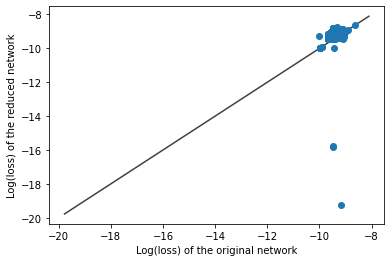

In [6]:
plt.scatter(np.log(data['loss'].values), np.log(data['loss_reduced_nn'].values))
plt.xlabel('Log(loss) of the original network')
plt.ylabel('Log(loss) of the reduced network')

lims = [
    np.min([plt.xlim(), plt.ylim()]),  # min of both axes
    np.max([plt.xlim(), plt.ylim()]),  # max of both axes
]

plt.plot(lims, lims, 'k-', alpha=0.75, zorder=0)

# Smallest eval vs. reduced smallest eval

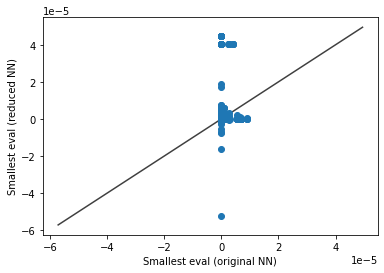

In [7]:
plt.scatter(data['smallest_eval'].values, data['smallest_eval_reduced_nn'].values)
plt.xlabel('Smallest eval (original NN)')
plt.ylabel('Smallest eval (reduced NN)')

lims = [
    np.min([plt.xlim(), plt.ylim()]),  # min of both axes
    np.max([plt.xlim(), plt.ylim()]),  # max of both axes
]

plt.plot(lims, lims, 'k-', alpha=0.75, zorder=0)

In [8]:
si_saddles_data = data[data['loss'] < data['loss_reduced_nn']]
si_saddles_data

,seed,loss,loss_reduced_nn,smallest_eval,smallest_eval_reduced_nn,l2_saddle_min,optimal_mu,min_perturbed_loss_1d,min_perturbed_loss_2d,num_points_perturbed_loss_2d,pair_smallest_dist,second_pair_smallest_dist,triplet_smallest_dist
0,0,0.000114,0.000116,5.284715e-12,1.518035e-06,2.083495e+00,11.881558,0.000114,0.000114,59,1.220074e-02,1.742863,0.966600
1,1,0.000084,0.000114,1.695950e-06,-5.626916e-09,9.353663e+00,-0.704904,0.000084,0.000084,1,3.618402e-01,0.444153,1.065187
3,3,0.000100,0.000138,3.841356e-11,3.600693e-08,7.139791e+00,22.248567,0.000100,0.000100,51,1.602316e-02,0.024659,1.330962
4,4,0.000084,0.000116,2.632542e-06,7.706396e-07,1.600697e+00,1.381865,0.000084,0.000084,1,5.565648e-01,0.565018,0.961066
5,5,0.000115,0.000115,-1.368012e-16,2.801548e-07,3.094787e-08,0.236827,0.000115,0.000115,54,4.124866e-08,1.244979,1.138372
...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,419,0.000073,0.000080,3.916452e-07,5.922722e-06,9.816210e-01,-0.578987,0.000073,0.000073,1,5.471838e-01,1.671818,0.963017
421,421,0.000114,0.000114,1.141409e-16,1.319826e-10,4.232613e-10,0.498460,0.000114,0.000114,272,1.076751e-10,1.085566,0.012648
422,422,0.000069,0.000090,6.011028e-13,1.159573e-11,1.835292e+01,0.222045,0.000069,0.000069,61,9.693322e-01,1.892655,1.345201
423,423,0.000069,0.000090,5.772653e-13,1.150711e-11,1.835292e+01,0.778281,0.000069,0.000069,69,9.693181e-01,1.892648,1.345207


# The histogram of points whose loss < loss(si saddle)

Text(0.5, 0, 'Distance between closest SI saddle and local min')

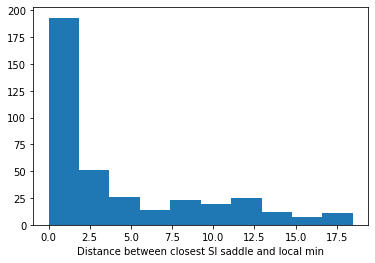

In [9]:
plt.hist(si_saddles_data['l2_saddle_min'].values)
plt.xlabel('Distance between closest SI saddle and local min')

# Number of points which are (potentially) not close to a SI saddle

In [24]:
large_dist_si_saddle_data = si_saddles_data[si_saddles_data['l2_saddle_min'] >= 3]
large_dist_si_saddle_data

,seed,loss,loss_reduced_nn,smallest_eval,smallest_eval_reduced_nn,l2_saddle_min,optimal_mu,min_perturbed_loss_1d,min_perturbed_loss_2d,num_points_perturbed_loss_2d,pair_smallest_dist,second_pair_smallest_dist,triplet_smallest_dist
1,1,0.000084,0.000114,1.695950e-06,-5.626916e-09,9.353663,-0.704904,0.000084,0.000084,1,0.361840,0.444153,1.065187
3,3,0.000100,0.000138,3.841356e-11,3.600693e-08,7.139791,22.248567,0.000100,0.000100,51,0.016023,0.024659,1.330962
12,12,0.000062,0.000090,6.941101e-06,4.047313e-10,16.769792,0.504198,0.000062,0.000062,1,0.834550,2.100122,1.563227
15,15,0.000069,0.000101,6.561857e-06,1.837093e-08,8.348877,-0.250168,0.000069,0.000069,1,0.645607,1.762673,1.478707
19,19,0.000072,0.000101,1.214046e-10,1.609031e-11,11.767704,0.777694,0.000072,0.000072,1,0.763762,1.061102,1.582254
...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,416,0.000109,0.000134,1.666341e-10,2.571547e-08,10.362190,1.779242,0.000109,0.000109,1,0.012281,3.167777,1.324529
418,418,0.000105,0.000105,1.495183e-11,8.694489e-08,4.402391,-3.785984,0.000105,0.000105,57,0.028790,1.004073,1.516996
422,422,0.000069,0.000090,6.011028e-13,1.159573e-11,18.352922,0.222045,0.000069,0.000069,61,0.969332,1.892655,1.345201
423,423,0.000069,0.000090,5.772653e-13,1.150711e-11,18.352922,0.778281,0.000069,0.000069,69,0.969318,1.892648,1.345207


# Loss vs. perturbed loss

## 1D perturbation loss

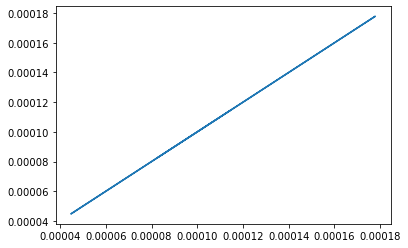

In [11]:
plt.plot(data['min_perturbed_loss_1d'], data['loss'])

## Number of points within the 2D perturbation

In [25]:
data[data['num_points_perturbed_loss_2d'] > 2]

,seed,loss,loss_reduced_nn,smallest_eval,smallest_eval_reduced_nn,l2_saddle_min,optimal_mu,min_perturbed_loss_1d,min_perturbed_loss_2d,num_points_perturbed_loss_2d,pair_smallest_dist,second_pair_smallest_dist,triplet_smallest_dist
0,0,0.000114,0.000116,5.284715e-12,1.518035e-06,2.083495e+00,11.881558,0.000114,0.000114,59,1.220074e-02,1.742863,9.665995e-01
3,3,0.000100,0.000138,3.841356e-11,3.600693e-08,7.139791e+00,22.248567,0.000100,0.000100,51,1.602316e-02,0.024659,1.330962e+00
5,5,0.000115,0.000115,-1.368012e-16,2.801548e-07,3.094787e-08,0.236827,0.000115,0.000115,54,4.124866e-08,1.244979,1.138372e+00
6,6,0.000114,0.000115,4.992821e-12,2.801545e-07,2.869187e-01,14.208819,0.000114,0.000114,67,1.202984e-02,1.195739,9.760837e-01
7,7,0.000102,0.000102,1.421374e-16,2.803744e-11,5.442317e-10,0.558648,0.000102,0.000102,71,7.696599e-10,0.023807,1.251820e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,420,0.000178,0.000178,-7.141116e-17,-1.489111e-16,2.415958e-09,0.298557,0.000178,0.000178,54,3.414759e-09,0.958903,4.876534e-09
421,421,0.000114,0.000114,1.141409e-16,1.319826e-10,4.232613e-10,0.498460,0.000114,0.000114,272,1.076751e-10,1.085566,1.264832e-02
422,422,0.000069,0.000090,6.011028e-13,1.159573e-11,1.835292e+01,0.222045,0.000069,0.000069,61,9.693322e-01,1.892655,1.345201e+00
423,423,0.000069,0.000090,5.772653e-13,1.150711e-11,1.835292e+01,0.778281,0.000069,0.000069,69,9.693181e-01,1.892648,1.345207e+00


## 2D perturbation loss

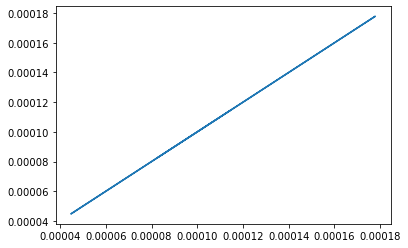

In [26]:
plt.plot(data['min_perturbed_loss_2d'], data['loss'])

# Number of 2 pairs of neurons close to each other

In [12]:
len(data[(data['pair_smallest_dist'] <= 0.1) & (data['second_pair_smallest_dist'] <= 0.1)])

59

In [13]:
data[(data['pair_smallest_dist'] <= 0.1) & (data['second_pair_smallest_dist'] <= 0.1)].head()

,seed,loss,loss_reduced_nn,smallest_eval,smallest_eval_reduced_nn,l2_saddle_min,optimal_mu,min_perturbed_loss_1d,min_perturbed_loss_2d,num_points_perturbed_loss_2d,pair_smallest_dist,second_pair_smallest_dist,triplet_smallest_dist
3,3,0.000100,0.000138,3.841356e-11,3.600693e-08,7.139791e+00,22.248567,0.000100,0.000100,51,1.602316e-02,0.024659,1.330962
7,7,0.000102,0.000102,1.421374e-16,2.803744e-11,5.442317e-10,0.558648,0.000102,0.000102,71,7.696599e-10,0.023807,1.251820
11,11,0.000050,0.000050,1.686795e-16,2.434122e-09,6.625508e-10,0.885393,0.000050,0.000050,68,9.369884e-10,0.062701,1.210102
16,16,0.000080,0.000102,2.770954e-11,2.456761e-11,1.309020e+00,25.040266,0.000080,0.000080,1,7.410762e-03,0.014382,1.472117
36,36,0.000114,0.000114,8.380664e-17,1.363240e-10,1.275301e-09,0.520915,0.000114,0.000114,1,6.360314e-10,0.012749,1.085562


In [14]:
min(data['pair_smallest_dist'])

5.815225544357096e-12

In [15]:
len(data[data['pair_smallest_dist'] <= 1e-2])

88

(array([175.,  69.,   6.,   1.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,  15.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  11.,   0.,   0.,   1.,   0.,   1.,   2.,   0.,   5.,   0.,
          0.,   0.,  10.,  11.,   0.,   9.,   5.,  16.,  10.,   0.,   0.,
          5.,   0.,   2.,   0.,   0.,   4.,   0.,   0.,   0.,   0.,  11.,
          0.,   1.,   9.,   0.,   0.,  11.,   1.,   9.,   0.,   1.,   1.,
          0.,   0.,  10.,   4.,   0.,   3.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          2.]),
 array([5.81522554e-12, 1.54526522e-02, 3.09053044e-02, 4.63579567e-02,
        6.18106089e-02, 7.72632611e-02, 9.27159133e-02, 1.08168566e-01,
        1.23621218e-01, 1.39073870e-01, 1.54526522e-01, 1.69979174e-01,
        1.85431827e-01, 2.00884479e-01, 2.16337131e-01, 2.31789783e-01,
        2.47242435e-01, 2.6269

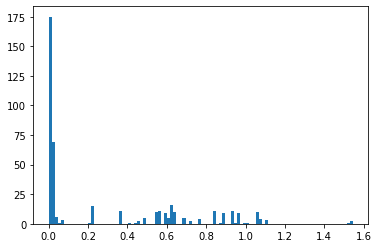

In [16]:
plt.hist(data['pair_smallest_dist'], 100)